# Number of Flights Data Analysis
### Fahmi F. Habib - Aerospace Engineering

#### Data analysis is made to find the correlation of Number of Flights with Covid-19 Phenomena. 
#### Flight data, Covid cases, and vaccination data are obtained from January 1, 2021 until November 28, 2021.
#### Flight data sources: https://www.flightradar24.com/data/statistics 
#### Covid case sources: https://ourworldindata.org/covid-cases 
#### Vaccination data sources: https://ourworldindata.org/covid-vaccinations 
#### Data from sources was processed by me.
#### Some important parameters such as Day# of pandemic, number of new and total cases, and number of people vaccinated.
#### ANN model is build to find the correlation between flight data and those important parameters.
#### The ANN model is used to predict the number of flights in the following week, based on the input parameters.

#### Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('flight_vs_covid_edit.xlsx')
df

,DateTime,Flights,MovingAvg,date,total_cases,new_cases,new_cases_per_billion,new_cases_smoothed,new_cases_smoothed_per_billion,Day,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,2021-01-01,55951,68909,44197,84296831,566617,71723.670886,598028.429,75699.801139,340,...,2,204487,1040694,0.15,0.09,0.00,0.00,132,602177,0.008
1,2021-01-02,67204,69069,44198,84902473,605642,76663.544304,612020.286,77470.922278,341,...,2,1181993,1184117,0.17,0.11,0.00,0.00,150,745924,0.009
2,2021-01-03,74148,69390,44199,85425434,522961,66197.594937,624852.857,79095.298354,342,...,2,364723,1199126,0.17,0.11,0.00,0.00,152,760249,0.010
3,2021-01-04,73561,69661,44200,85975750,550316,69660.253165,633734.286,80219.529873,343,...,2,1130604,1249774,0.19,0.13,0.00,0.00,159,803559,0.010
4,2021-01-05,70386,69282,44201,86719564,743814,94153.670886,643933.857,81510.614810,344,...,2,2114689,1411230,0.21,0.14,0.00,0.00,179,835700,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2021-11-24,95597,92954,44524,259467478,672616,85141.265823,569569.571,72097.414051,667,...,225756854,36999544,31796155,99.50,53.90,42.32,2.87,4038,26888496,0.341
328,2021-11-25,84696,91386,44525,260063320,595842,75423.037975,567100.143,71784.828228,668,...,230031719,28599022,31473844,99.86,53.98,42.45,2.92,3997,26709293,0.339
329,2021-11-26,86960,89667,44526,260660212,596892,75555.949367,564384.571,71441.084937,669,...,234168790,34894810,31785581,100.31,54.09,42.61,2.97,4036,8898368,0.113
330,2021-11-27,84404,89326,44527,261073662,413450,52335.443038,555353.286,70297.884304,670,...,237438402,27160757,30660648,100.65,54.17,42.71,3.02,3893,8311865,0.106


#### Importing the test data (number of flights, cases, and vaccination data in the next week)

In [3]:
df_test = pd.read_excel('flight_vs_covid_test.xlsx')
df_test

,DateTime,Flights,MovingAvg,Day,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,2021-11-29,95528,90495,672,261516772,405902,561865.286,5199921,4647,6944.000,...,240824401,38064184,33061767,101.25,54.32,42.92,3.06,4198,9027796,0.115
1,2021-11-30,94947,90553,673,262182633,665861,567740.571,5207691,7770,7020.000,...,244906202,32873674,33534212,101.67,54.46,43.49,3.11,4258,9391329,0.119
2,2021-12-01,94934,90459,674,262808041,625408,573077.429,5215558,7867,7005.571,...,250315690,39164736,34584157,102.16,54.56,43.66,3.18,4392,9422702,0.120
3,2021-12-02,98004,92360,675,263511677,703636,577489.429,5224688,9130,7082.143,...,256086757,42582713,35323514,102.70,54.71,43.85,3.25,4486,9286189,0.118
4,2021-12-03,100010,94224,676,264215462,703785,592886.857,5234682,9994,7405.286,...,261691538,39707716,36837008,103.21,54.83,44.04,3.32,4678,9715692,0.123
5,2021-12-04,85703,94410,677,264933713,718251,610500.143,5243348,8666,7690.000,...,267815477,26586547,35572233,103.55,54.89,44.15,3.40,4517,9125063,0.116
6,2021-12-05,86733,93694,678,265440690,506977,618545.714,5248690,5342,7630.857,...,270540559,30784327,35680557,103.94,54.97,44.29,3.44,4531,8970740,0.114
7,2021-12-06,91517,93121,679,265864109,423419,621048.143,5255859,7169,7991.143,...,272035138,25401936,33871664,104.26,55.04,44.40,3.45,4301,8058855,0.102


#### Defining the input and output parameters

In [4]:
Xtes = df_test.loc[:, ['total_cases', 'people_vaccinated', 'new_cases_smoothed']]
Xtes

,total_cases,people_vaccinated,new_cases_smoothed
0,261516772,4277949872,561865.286
1,262182633,4288385559,567740.571
2,262808041,4296807266,573077.429
3,263511677,4308046841,577489.429
4,264215462,4318007815,592886.857
5,264933713,4322710733,610500.143
6,265440690,4329029481,618545.714
7,265864109,4334361857,621048.143


In [5]:
ytes = df_test.loc[:, ['MovingAvg']]
ytes

,MovingAvg
0,90495
1,90553
2,90459
3,92360
4,94224
5,94410
6,93694
7,93121


In [6]:
X = df.loc[:, ['total_cases', 'people_vaccinated', 'new_cases_smoothed']]
y = df.loc[:, ['MovingAvg']]

In [7]:
X

,total_cases,people_vaccinated,new_cases_smoothed
0,84296831,7375801,598028.429
1,84902473,8557196,612020.286
2,85425434,8920237,624852.857
3,85975750,9985978,633734.286
4,86719564,11185616,643933.857
...,...,...,...
327,259467478,4244279117,569569.571
328,260063320,4251125889,567100.143
329,260660212,4259854538,564384.571
330,261073662,4265942495,555353.286


In [8]:
y

,MovingAvg
0,68909
1,69069
2,69390
3,69661
4,69282
...,...
327,92954
328,91386
329,89667
330,89326


#### Plotting the parameters to see early correlation / hypothesis

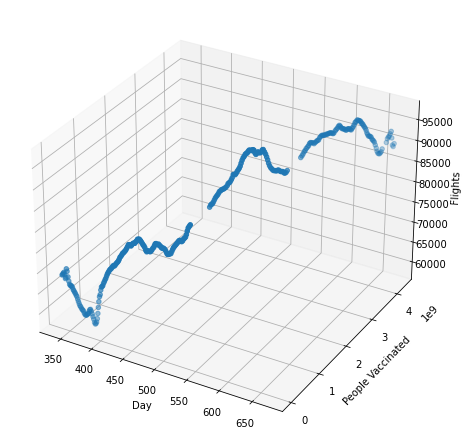

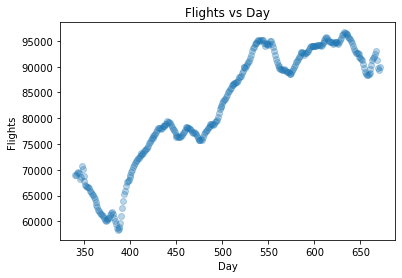

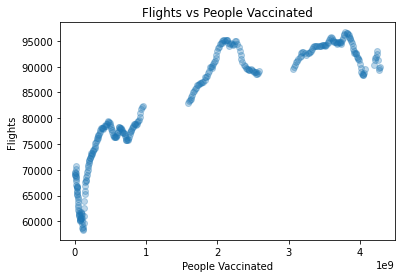

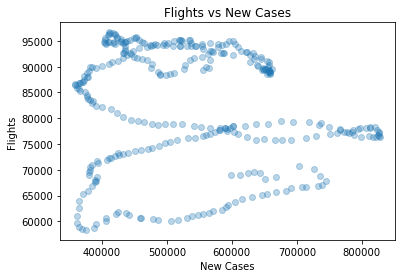

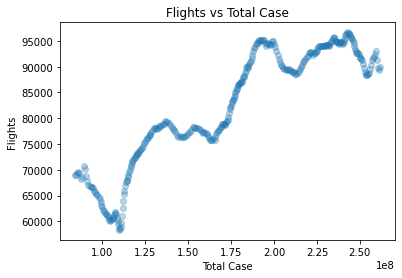

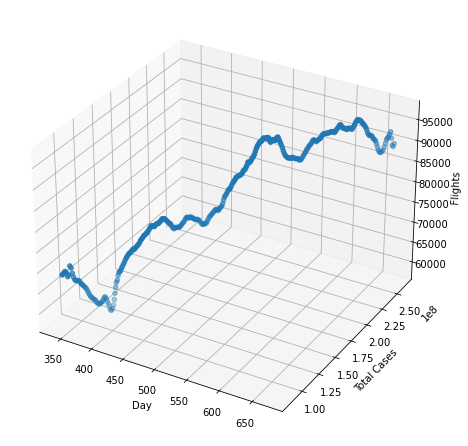

In [9]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(df['Day'], df['people_vaccinated'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('People Vaccinated')
clplot.set_zlabel('Flights')
plt.show()

plt.scatter(df['Day'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Flights')
plt.title('Flights vs Day')
plt.show()

plt.scatter(df['people_vaccinated'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.show()

plt.scatter(df['new_cases_smoothed'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.show()

plt.scatter(df['total_cases'], df['MovingAvg'], alpha = 0.3)
plt.xlabel('Total Case')
plt.ylabel('Flights')
plt.title('Flights vs Total Case')
plt.show()

figFlights = plt.figure(figsize = [6,6])
clplot = Axes3D(figFlights)
clplot.scatter(df['Day'], df['total_cases'], df['MovingAvg'])
clplot.set_xlabel('Day')
clplot.set_ylabel('Total Cases')
clplot.set_zlabel('Flights')
plt.show()


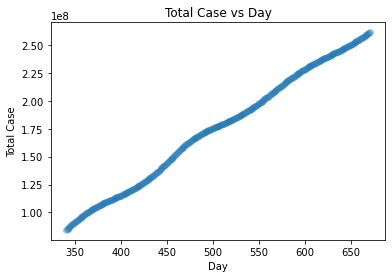

In [10]:
plt.scatter(df['Day'], df['total_cases'], alpha = 0.3)
plt.xlabel('Day')
plt.ylabel('Total Case')
plt.title('Total Case vs Day')
plt.show()

#### Splitting Data into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 29)

In [12]:
X_test

,total_cases,people_vaccinated,new_cases_smoothed
29,102894523,63227274,548036.429
203,193741670,2128058111,534958.857
235,213741877,2571642067,658866.571
47,110281507,114603427,369912.571
217,202230166,2324261692,627585.429
219,203222679,2346852289,627734.857
135,163531058,724794758,677416.857
173,180059586,1751610971,364949.000
249,222466559,3248937656,601898.000
271,233724423,3570064006,457096.714


In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtes, ytes, test_size = 0.8, random_state = 0)

In [14]:
Xtest

,total_cases,people_vaccinated,new_cases_smoothed
6,265440690,4329029481,618545.714
2,262808041,4296807266,573077.429
1,262182633,4288385559,567740.571
7,265864109,4334361857,621048.143
3,263511677,4308046841,577489.429
0,261516772,4277949872,561865.286
5,264933713,4322710733,610500.143


In [15]:
ytest

,MovingAvg
6,93694
2,90459
1,90553
7,93121
3,92360
0,90495
5,94410


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
Xtest = scaler.transform(Xtest)

y_train = scalery.fit_transform(y_train)
ytest = scalery.transform(ytest)

#### ANN model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
NNmodel = Sequential()

NNmodel.add(Dense(27,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(27,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(3,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 1,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [21]:
NNmodel.fit(x=X_train, y=y_train, epochs=1000, validation_data=(Xtest,ytest), callbacks=[early_stop])

Epoch 1/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.4344 - val_loss: 0.5746
Epoch 2/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.3172 - val_loss: 0.3637
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2127 - val_loss: 0.1853
Epoch 4/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.1279 - val_loss: 0.0599
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0658 - val_loss: 0.0046
Epoch 6/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0346 - val_loss: 0.0081
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0284 - val_loss: 0.0291
Epoch 8/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.0296
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.0247 - val_loss: 0.0236
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.020

<AxesSubplot:>

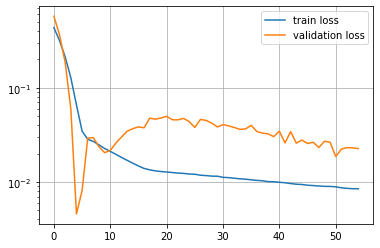

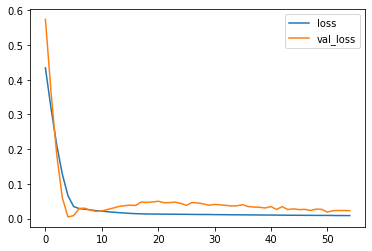

In [22]:
losses = pd.DataFrame(NNmodel.history.history)
plt.grid()
plt.yscale("log")
plt.plot(losses['loss'], label='train loss')
plt.plot(losses['val_loss'], label='validation loss')
plt.legend()
losses[['loss', 'val_loss']].plot()

#### Building predictions and evaluation

In [23]:
predictions = NNmodel.predict(Xtest)

In [24]:
predictions = scalery.inverse_transform(predictions)
ytest = scalery.inverse_transform(ytest)

In [25]:
mse_MovingAvg = mean_squared_error(ytest[:,0], predictions[:,0])
print(f"Mean Squared Error for MovingAvg: {mse_MovingAvg}")
mae_MovingAvg = np.sum(np.absolute(ytest[:,0]- predictions[:,0]))/len(ytest)
print(f"Mean Absolute Error for MovingAvg: {mae_MovingAvg}\n")

Mean Squared Error for MovingAvg: 32603176.025451668
Mean Absolute Error for MovingAvg: 5584.0703125



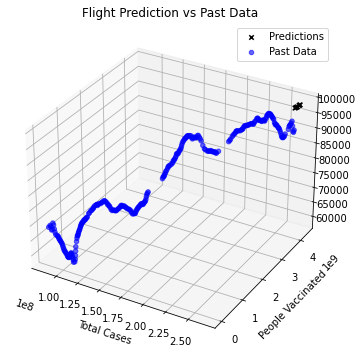

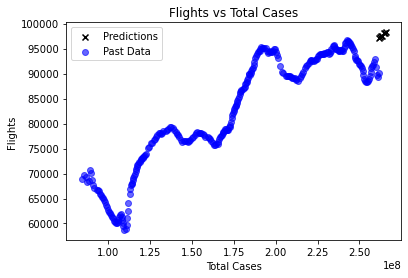

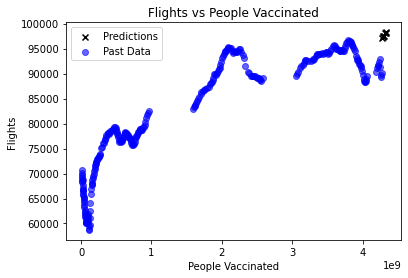

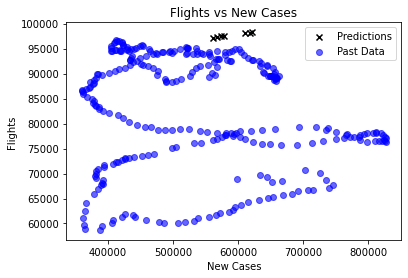

In [58]:
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(Xtest)[:,0], scaler.inverse_transform(Xtest)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_train)[:,0], scaler.inverse_transform(X_train)[:,1], scalery.inverse_transform(y_train)[:,0], color = "blue", alpha=0.6, label='Past Data')
plt.title("Flight Prediction vs Past Data")
plt.xlabel('Total Cases')
plt.ylabel('People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_train)[:,0], scalery.inverse_transform(y_train)[:,0], color = "blue", alpha=0.6, label='Past Data')
plt.xlabel('Total Cases')
plt.ylabel('Flights')
plt.title('Flights vs Total Cases')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_train)[:,1], scalery.inverse_transform(y_train)[:,0], color = "blue", alpha=0.6, label='Past Data')
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,2], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_train)[:,2], scalery.inverse_transform(y_train)[:,0], color = "blue", alpha=0.6, label='Past Data')
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.legend()
plt.show()

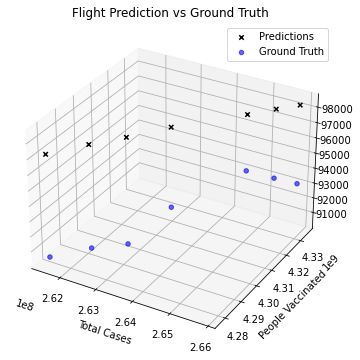

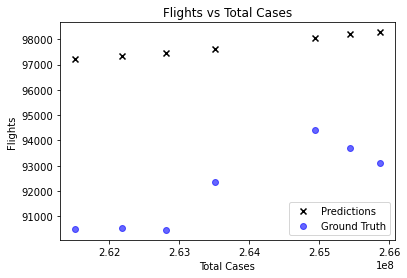

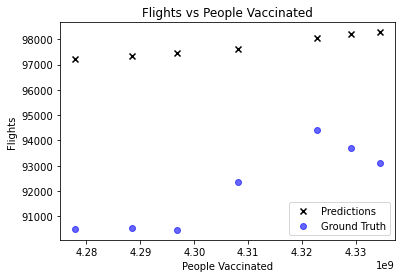

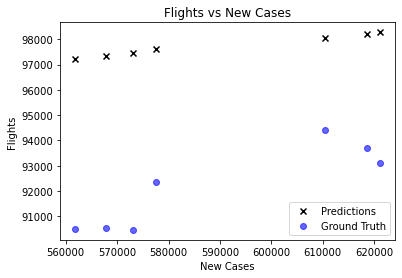

In [40]:
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(Xtest)[:,0], scaler.inverse_transform(Xtest)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(Xtest)[:,0], scaler.inverse_transform(Xtest)[:,1], ytest[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("Flight Prediction vs Ground Truth")
plt.xlabel('Total Cases')
plt.ylabel('People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(Xtest)[:,0], ytest[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('Total Cases')
plt.ylabel('Flights')
plt.title('Flights vs Total Cases')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(Xtest)[:,1], ytest[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('People Vaccinated')
plt.ylabel('Flights')
plt.title('Flights vs People Vaccinated')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(Xtest)[:,2], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(Xtest)[:,2], ytest[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('New Cases')
plt.ylabel('Flights')
plt.title('Flights vs New Cases')
plt.legend()
plt.show()

In [57]:
sample_number = 6
#alldata=len(predictions)
print("[Flight]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {ytest[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(ytest[i]-predictions[i])
    print(f"error: {error}")
    accuracy = (1-(error/ytest[i]))*100
    print(f"Accuracy: {accuracy}%\n--------------------------------------------------")


[Flight]
Sample Data 1: [93694.]
Prediction 1: [98201.46]
error: [4507.4609375]
Accuracy: [95.189168]%
--------------------------------------------------
Sample Data 2: [90459.]
Prediction 2: [97473.984]
error: [7014.984375]
Accuracy: [92.24512279]%
--------------------------------------------------
Sample Data 3: [90553.]
Prediction 3: [97344.875]
error: [6791.875]
Accuracy: [92.49955827]%
--------------------------------------------------
Sample Data 4: [93121.]
Prediction 4: [98280.8]
error: [5159.796875]
Accuracy: [94.45904052]%
--------------------------------------------------
Sample Data 5: [92360.]
Prediction 5: [97604.07]
error: [5244.0703125]
Accuracy: [94.32214128]%
--------------------------------------------------
Sample Data 6: [90495.]
Prediction 6: [97208.234]
error: [6713.234375]
Accuracy: [92.58165161]%
--------------------------------------------------
